In [1]:
import os
import numpy as np
import pandas as pd

CSVファイルのパスを定義

In [2]:
csv_path = os.path.join('data', 'housing.csv')

pandasを使ってデータロード

In [3]:
housing = pd.read_csv(csv_path)

In [4]:
housing[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## pandas.DataFrame.hist
### parameter
* bin：柱の数を指定
* figsize：図の大きさを指定

In [6]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

<Figure size 2000x1500 with 9 Axes>

# 特定のグラフを描画
列名をしていする（pandas.DataFrame[列名]）

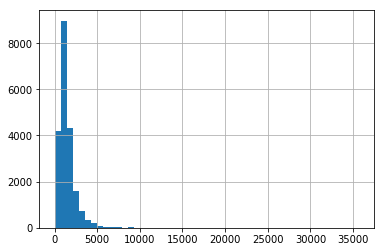

In [7]:
housing['population'].hist(bins=50)
plt.show()

### padas.DataFrame.where

In [8]:
data = pd.DataFrame({'A':[1,2,3,4,5]})
print(data)

   A
0  1
1  2
2  3
3  4
4  5


In [9]:
data['B'] = data['A'].where(data['A']>3)
print(data)

   A    B
0  1  NaN
1  2  NaN
2  3  NaN
3  4  4.0
4  5  5.0


* 第二引数を指定するとNaNのところに指定した値が埋め込まれる

In [10]:
data['C'] = data['A'].where(data['A']>3, 10)
print(data)

   A    B   C
0  1  NaN  10
1  2  NaN  10
2  3  NaN  10
3  4  4.0   4
4  5  5.0   5


* 「inplace=True」とすると元のオブジェクトを上書きする

In [11]:
data['D'] = data['A'] # 列Aをコピー
data['D'].where(data['D']>3, 10, inplace=True)
print(data)

   A    B   C   D
0  1  NaN  10  10
1  2  NaN  10  10
2  3  NaN  10  10
3  4  4.0   4   4
4  5  5.0   5   5


# 相関を求める

In [12]:
data1 = np.random.rand(100)
data2 = np.random.rand(100)
data3 = np.random.rand(100)
data = pd.DataFrame({'data1':data1, 'data2': data2, 'data3': data3})
print(data.corr())

          data1     data2     data3
data1  1.000000  0.016602  0.058649
data2  0.016602  1.000000 -0.110682
data3  0.058649 -0.110682  1.000000


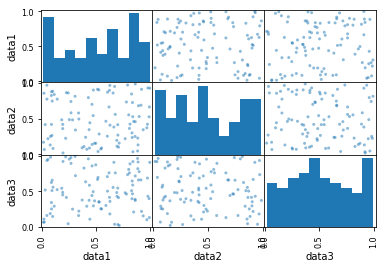

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

## データを自分で作成する

In [16]:
data_sample = pd.DataFrame({'sample': [1,2,3]})
print(data_sample)

   sample
0       1
1       2
2       3


### 任意の位置の値を取得・変更する

In [24]:
test = housing.copy()
test['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [28]:
test['ocean_proximity'].loc[:, '<1H OCEAN'] = 0

IndexingError: (slice(None, None, None), '<1H OCEAN')